# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [4]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [5]:
# def fetch_movie_urls(url):
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
#     }
#     response = requests.get(url, headers=headers)
#     if response.status_code != 200:
#         return "Failed to retrieve the page, status code:", response.status_code
#     soup = BeautifulSoup(response.text, 'html.parser')
#     return soup


# url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
# soup= fetch_movie_urls(url)
# print(soup.prettify())


## Hint : Use the following code to extract the film urls
# movie_links = soup.find_all('a', href=True)
# movie_urls = [link['href'] for link in movie_links if '/movie/' in link['href']]

# url_list=[]
# for x in movie_urls:
#   url_list.append('https://www.justwatch.com'+x)


# for link in movie_urls:
#         full_url = 'https://www.justwatch.com' + link
#         title = link.split('/')[-1].replace('-', ' ').title()  # Assuming the title is in the URL
#         movie_titles.append(title)
# print(movie_titles)



headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

# URL from which movies data is fetched
url="https://www.justwatch.com/in/movies?release_year_from=2000"

# Sending an HTTP GET request to the URL
response = requests.get(url,headers=headers)

# Parsing HTML content with Beautiful Soup
soup = BeautifulSoup(response.text,'html.parser')
#print(soup.prettify())


## **Fetching Movie Title**

In [6]:
# Write Your Code here
#Scrapping Movie Title
movie_title_list=[]# List to store all movie title

# Extracting all movie titles from  tag and storing them in movie_titles
movie_titles = soup.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each movie title from movie_titles and storing in movie_title_list
for movie_title in movie_titles:

    # Extract the 'href' attribute value, which contains the movie title
    data_id_value = movie_title['href']

    # Removing the '/in/movie/' prefix to get the clean movie title
    data_id_value = data_id_value.replace("/in/movie/","")

    # Converting the movie title to uppercase and appending to the list
    movie_title_list.append(data_id_value)

In [7]:
movie_title_list

['lucky-baskhar',
 'bhool-bhulaiyaa-3',
 'ntr-30',
 'deadpool-3',
 'stree-2',
 'kishkkindha-kandam',
 'pushpa-the-rule-part-2',
 'the-substance',
 'amaran-2024',
 'vettaiyan',
 'venom-3-2024',
 'all-we-imagine-as-light',
 'bagheera-2024',
 'pushpa',
 'gladiator',
 'martin',
 'kanguva',
 'singham-again-2024-0',
 'the-wild-robot',
 'alien-romulus',
 'ajayante-randam-moshanam',
 'meiyazhagan',
 'vicky-vidya-ka-woh-wala-video',
 'black-2024',
 'the-buckingham-murders',
 'the-sabarmati-report',
 'siddharth-roy',
 'do-patti',
 'lubber-pandhu',
 'tumbbad',
 'a-quiet-place-day-one',
 'smile-2',
 'sikandar-ka-muqaddar',
 'bhool-bhulaiyaa-2',
 'my-old-ass',
 'oldboy-2003',
 '365-days',
 'red-one',
 'kill-2024',
 'kalki-2898-ad',
 'transformers-one-2024',
 'furiosa',
 'it-ends-with-us',
 'jigra-2024',
 'khel-khel-mein',
 'ka-2024',
 'gladiator-2',
 'yudhra',
 'caddo-lake',
 'the-bastard',
 'bloody-beggar-2024',
 'salaar',
 'neposlushnaia',
 'mangalavaram',
 'longlegs',
 'animal-2022',
 'thalapath

## **Scrapping Movie URL's**

In [8]:
# Write Your Code here
movies_url_list=[] # List to store all movie urls

# For every movie title present in movies_title_list , Finding their url
for movie in movie_title_list:

    # Constructing the absolute URL for fetching each movie
    movies_url = 'https://www.justwatch.com/in/movie/' + movie
    movies_url_list.append(movies_url)

In [9]:
movies_url_list

['https://www.justwatch.com/in/movie/lucky-baskhar',
 'https://www.justwatch.com/in/movie/bhool-bhulaiyaa-3',
 'https://www.justwatch.com/in/movie/ntr-30',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/kishkkindha-kandam',
 'https://www.justwatch.com/in/movie/pushpa-the-rule-part-2',
 'https://www.justwatch.com/in/movie/the-substance',
 'https://www.justwatch.com/in/movie/amaran-2024',
 'https://www.justwatch.com/in/movie/vettaiyan',
 'https://www.justwatch.com/in/movie/venom-3-2024',
 'https://www.justwatch.com/in/movie/all-we-imagine-as-light',
 'https://www.justwatch.com/in/movie/bagheera-2024',
 'https://www.justwatch.com/in/movie/pushpa',
 'https://www.justwatch.com/in/movie/gladiator',
 'https://www.justwatch.com/in/movie/martin',
 'https://www.justwatch.com/in/movie/kanguva',
 'https://www.justwatch.com/in/movie/singham-again-2024-0',
 'https://www.justwatch.com/in/movie/the-wild-robot',
 'ht

## **Scrapping release Year**

In [10]:
# List to store movie URLs and release years
release_year_list= []
# Loop through each movie title to extract the URL and fetch release year
for movie in movie_title_list:
    try:
        full_url = 'https://www.justwatch.com/in/movie/' + movie

        # Fetch the HTML content for the movie URL
        response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            title_element = soup.find('h1', class_='title-detail-hero__details__title')
            release_year_element = title_element.find('span', class_='release-year')
            if release_year_element:
                    release_year = release_year_element.text.strip("()")
            else:
                    release_year = 'N/A'

              #  release_year = release_year_element.get_text(strip=True).strip("()")

        else:
            release_year = 'N/A'
        release_year_list.append(release_year)
    except Exception as e:
        print(f'Error processing movie: {e}')

In [11]:
release_year_list

['2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2021',
 '2000',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024',
 '2024',
 '2024',
 '2022',
 '2024',
 '2003',
 '2020',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2023',
 '2024',
 '2023',
 '2023',
 '2023',
 '2024',
 '2023',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2013',
 '2018',
 '2016',
 '2024',
 '2024',
 '2024',
 '2018',
 '2018',
 '2024',
 '2019',
 '2024',
 '2024',
 '2024',
 '2024',
 '2015',
 '2021',
 '2019',
 '2007',
 '2018',
 '2024',
 '2015',
 '2023',
 '2023',
 '2001',
 '2023',
 '2024',
 '2024',
 '2022',
 '2024',
 '2015',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2024']

## **Scrapping Genres**

In [12]:
genres_list = []
for movie in movie_title_list:
      full_url = 'https://www.justwatch.com/in/movie/' + movie
      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})

      if response.status_code == 200:
          soup = BeautifulSoup(response.text, 'html.parser')
          try:
             # Genres
              genres_heading = soup.find('h3', string="Genres")
              if genres_heading:
                  genres_div = genres_heading.find_next_sibling('div', class_='detail-infos__value')
                  if genres_div:
                      genres_span = genres_div.find('span')
                      if genres_span:
                       genres_details = genres_span.text.strip()
                      else:
                       genres_details='N/A'
                      #genres_details['Genres'] = genres_span.get_text(strip=True) if genres_span else 'N/A'
          except Exception as e:
              print(f"An error occurred: {e}")

          genres_list.append(genres_details)

      else:
          print(f"Failed to fetch the page, status code: {response.status_code}")

In [13]:
genres_list

['Drama, Mystery & Thriller, Crime',
 'Comedy, Horror',
 'Mystery & Thriller, Action & Adventure, Drama',
 'Science-Fiction, Comedy, Action & Adventure',
 'Comedy, Horror',
 'Mystery & Thriller, Drama',
 'Crime, Action & Adventure, Mystery & Thriller, Drama',
 'Horror, Science-Fiction, Drama',
 'Drama, War & Military, Action & Adventure',
 'Action & Adventure, Crime, Drama',
 'Action & Adventure, Science-Fiction, Mystery & Thriller',
 'Drama, Romance',
 'Action & Adventure',
 'Mystery & Thriller, Crime, Drama, Action & Adventure',
 'Drama, Action & Adventure',
 'Mystery & Thriller, Action & Adventure, Drama',
 'Action & Adventure, Mystery & Thriller, Fantasy, Drama',
 'Drama, Action & Adventure',
 'Animation, Science-Fiction, Action & Adventure',
 'Horror, Science-Fiction, Mystery & Thriller',
 'Action & Adventure, Drama, Comedy',
 'Drama, Kids & Family',
 'Comedy',
 'Mystery & Thriller, Horror, Science-Fiction',
 'Crime, Drama, Mystery & Thriller',
 'Drama, Mystery & Thriller',
 'Dram

## **Scrapping IMBD Rating**

In [14]:
# Write Your Code here
imdb_rating_list=[]
for movie in movie_title_list:

      full_url = 'https://www.justwatch.com/in/movie/' + movie
      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})

      if response.status_code == 200:
          soup = BeautifulSoup(response.text, 'html.parser')
          try:
              # Rating
              rating_div = soup.find('div', class_='jw-scoring-listing')
              if rating_div:
                  imdb_rating = rating_div.find('div', class_='jw-scoring-listing__rating--link')
                  if imdb_rating:
                      details = imdb_rating.text.strip()
                  else:
                      details = 'N/A'
          except Exception as e:
              print(f"An error occurred: {e}")
              details = 'N/A'
          imdb_rating_list.append(details)
      else:
          print(f"Failed to fetch the page, status code: {response.status_code}")


In [15]:
imdb_rating_list

['8.2  (12k)',
 '5.1  (70k)',
 '6.1  (16k)',
 '7.7  (409k)',
 '7.0  (36k)',
 '8.1  (6k)',
 '6.8  (16k)',
 '7.4  (157k)',
 '8.4  (10k)',
 '7.1  (37k)',
 '6.2  (47k)',
 '7.4  (2k)',
 '6.9  (5k)',
 '7.6  (92k)',
 '8.5  (1m)',
 '2.4  (35k)',
 '5.1  (12k)',
 '5.9  (69k)',
 '8.3  (92k)',
 '7.1  (181k)',
 '7.2  (6k)',
 '8.4  (10k)',
 '5.6  (8k)',
 '7.2  (1k)',
 '6.0  (9k)',
 '6.8  (20k)',
 '6.6  (2k)',
 '6.5  (66k)',
 '8.2  (4k)',
 '8.2  (65k)',
 '6.3  (121k)',
 '6.9  (59k)',
 '6.1  (17k)',
 '5.7  (34k)',
 '7.0  (22k)',
 '8.3  (658k)',
 '3.3  (101k)',
 '6.8  (38k)',
 '7.6  (33k)',
 '7.1  (55k)',
 '7.6  (35k)',
 '7.5  (237k)',
 '6.5  (53k)',
 '6.7  (18k)',
 '6.5  (25k)',
 '7.2  (1k)',
 '6.9  (95k)',
 '5.1  (12k)',
 '6.9  (30k)',
 '7.7  (27k)',
 '6.2  (3k)',
 '6.6  (71k)',
 '4.8  (1k)',
 '6.8  (3k)',
 '6.7  (140k)',
 '6.1  (101k)',
 '5.8  (20k)',
 '7.1  (31k)',
 '8.3  (2k)',
 '7.2  (4k)',
 '6.4  (23k)',
 '7.0  (4k)',
 '7.0',
 '6.7',
 '8.2  (1m)',
 '7.7  (7k)',
 '6.1  (44k)',
 '8.5  (555k)',
 '7

## **Scrapping Runtime/Duration**

In [16]:
# Write Your Code here
runtime_list=[]
for movie in movie_title_list:

      full_url = 'https://www.justwatch.com/in/movie/' + movie

      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})

      if response.status_code == 200:
          soup = BeautifulSoup(response.text, 'html.parser')
          try:
              # Runtime
              runtime_heading =  soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
          except Exception as e:
              runtime_heading = 'N/A'
              print(f"An error occurred: {e}")
          runtime_list.append(runtime_heading)
      else:
          print(f"Failed to fetch the page, status code: {response.status_code}")
print(runtime_list)

['2h 50min', '2h 38min', '2h 56min', '2h 8min', '2h 27min', '2h 13min', '3h 18min', '2h 21min', '2h 47min', '2h 43min', '1h 49min', '1h 58min', '2h 38min', '2h 59min', '2h 35min', '2h 27min', '2h 34min', '2h 30min', '1h 42min', '1h 59min', '2h 27min', '2h 57min', '2h 32min', '2h 30min', '1h 47min', '2h 7min', '2h 28min', '2h 7min', '2h 26min', '1h 44min', '1h 39min', '2h 7min', '2h 22min', '2h 23min', '1h 29min', '2h 0min', '1h 54min', '2h 4min', '1h 45min', '3h 0min', '1h 44min', '2h 28min', '2h 10min', '2h 35min', '2h 15min', '2h 31min', '2h 28min', '2h 22min', '1h 43min', '2h 7min', '2h 19min', '2h 55min', '1h 49min', '2h 29min', '1h 41min', '3h 21min', '3h 3min', '1h 37min', '2h 22min', '2h 0min', '2h 3min', '2h 36min', '1h 54min', '2h 7min', '3h 0min', '2h 19min', '1h 46min', '2h 46min', '1h 48min', '2h 25min', '1h 52min', '2h 36min', '2h 35min', '1h 35min', '2h 21min', '2h 14min', '1h 34min', '1h 56min', '2h 5min', '1h 45min', '1h 49min', '2h 38min', '2h 39min', '1h 43min', '1h 3

## **Scrapping Age Rating**

In [17]:
# Write Your Code here

age_rating_list = []
for movie in movie_title_list:

      full_url = 'https://www.justwatch.com/in/movie/' + movie

      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})

      if response.status_code == 200:
          soup = BeautifulSoup(response.text, 'html.parser')
          try:
              # Age Rating
              age_rating_heading = soup.find('h3', string="Age rating")
              if age_rating_heading:
                  age_rating_div = age_rating_heading.find_next_sibling('div', class_='detail-infos__value')
                  if age_rating_div:
                       age_rating_value = age_rating_div.text.strip()
                  else:
                       age_rating_value='N/A'
          except Exception as e:
              print(f"An error occurred: {e}")
          age_rating_list.append(age_rating_value)
      else:
          print(f"Failed to fetch the page, status code: {response.status_code}")
print(age_rating_list)

['UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'U', 'UA', 'UA', 'A', 'UA', 'A', 'A', 'U', 'A', 'A', 'A', 'A', 'UA', 'UA', 'A', 'A', 'A', 'A', 'UA', 'U', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'A', 'A', 'UA', 'A', 'A', 'A', 'A', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'A', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'UA', 'U', 'A', 'A', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'U', 'A', 'A', 'A', 'U', 'UA', 'UA', 'UA', 'A', 'UA', 'A', 'A', 'UA', 'UA', 'UA', 'U', 'U']


## **Fetching Production Countries Details**

In [18]:
# Write Your Code here
production_country_list =[]
for movie in movie_title_list:

      full_url = 'https://www.justwatch.com/in/movie/' + movie

      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})
      soup = BeautifulSoup(response.text, 'html.parser')
      try:
              country1=soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
              production_country_list.append(country1)
      except:
              country1 = 'NA'

print(production_country_list)

['India', 'India', 'India', 'United States', 'India', 'India', 'India', 'France, United Kingdom', 'India', 'India', 'United States', 'India, Italy, Luxembourg, Netherlands, France', 'India', 'India', 'United Kingdom, United States', 'India', 'India', 'India', 'United States, Japan', 'United States, Hungary, Australia, New Zealand, Canada, United Kingdom', 'India', 'India', 'India', 'India', 'India, United Kingdom', 'India', 'India', 'India', 'India', 'India, Sweden', 'United Kingdom, Canada, United States', 'United States', 'India', 'India', 'United States, United Kingdom, Canada', 'South Korea', 'Poland', 'United States', 'India', 'India', 'United States', 'Australia, United States', 'United States', 'India', 'India', 'India', 'Malta, United States, United Kingdom, Morocco, Canada', 'India', 'United States', 'Denmark, Germany, Sweden', 'India', 'India', 'Russia', 'India', 'Canada, United States', 'India', 'India', 'United States', 'India', 'India', 'India', 'India', 'India', 'India', 

## **Fetching Streaming Service Details**

In [19]:
# Write Your Code here
movie_streaming_list =[]
for movie in movie_title_list:

      full_url = 'https://www.justwatch.com/in/movie/' + movie

      response = requests.get(full_url)
      soup = BeautifulSoup(response.text, 'html.parser')
      try:
            # Find the provider element
            provider_element=soup.find('img', class_='offer__icon')
            if provider_element:
                provider_name=provider_element.get('alt')
            else:
                  provider_name='N/A'
            movie_streaming_list.append(provider_name)
      except:
            provider_name='N/A'

print(movie_streaming_list)

['Netflix', 'Bookmyshow', 'Netflix', 'Apple TV', 'Amazon Prime Video', 'Hotstar', 'Bookmyshow', 'MUBI', 'Netflix', 'Amazon Prime Video', 'Bookmyshow', 'Bookmyshow', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Bookmyshow', 'Apple TV', 'Apple TV', 'Hotstar', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Netflix', 'Bookmyshow', 'aha', 'Netflix', 'Hotstar', 'Bookmyshow', 'Amazon Prime Video', 'Apple TV', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'N/A', 'Hotstar', 'Amazon Prime Video', 'Apple TV', 'Apple TV', 'Apple TV', 'Netflix', 'Netflix', 'Bookmyshow', 'Bookmyshow', 'Amazon Prime Video', 'Apple TV', 'Amazon Prime Video', 'Amazon Prime Video', 'VI movies and tv', 'Amazon Video', 'Amazon Prime Video', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Amazon Prime Video', 'Bookmyshow', 'Amazon Prime Video', 'Hotstar', 'N/A', 'Amazon Prime Video', 'Amazon Prime Video', 'Lionsgate Play', 'VI movies and tv', 

In [20]:
movie_streaming_list

['Netflix',
 'Bookmyshow',
 'Netflix',
 'Apple TV',
 'Amazon Prime Video',
 'Hotstar',
 'Bookmyshow',
 'MUBI',
 'Netflix',
 'Amazon Prime Video',
 'Bookmyshow',
 'Bookmyshow',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Bookmyshow',
 'Apple TV',
 'Apple TV',
 'Hotstar',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Netflix',
 'Bookmyshow',
 'aha',
 'Netflix',
 'Hotstar',
 'Bookmyshow',
 'Amazon Prime Video',
 'Apple TV',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'N/A',
 'Hotstar',
 'Amazon Prime Video',
 'Apple TV',
 'Apple TV',
 'Apple TV',
 'Netflix',
 'Netflix',
 'Bookmyshow',
 'Bookmyshow',
 'Amazon Prime Video',
 'Apple TV',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'VI movies and tv',
 'Amazon Video',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'Amazon Prime Video',
 'Bookmyshow',
 'Amazon Prime Video',
 'Hotstar',
 'N/A',
 'Amazon Prime Video'

## **Now Creating Movies DataFrame**

In [96]:
# Write Your Code here
#Creatind datafame of scrapped movie data
data_dict={
    'Movie Names':movie_title_list,
    'Release Year':release_year_list,
    'Movie Genres':genres_list,
    'Movie IMDb Ratings':imdb_rating_list,
    'Movie Url':movies_url_list,
    'Age rating':age_rating_list,
    'Production country':production_country_list,
    'Movie Streaming Service':movie_streaming_list,
    'Runtime':runtime_list
}

df_movie=pd.DataFrame(data_dict)
print(df_movie.T)


                                                                       0   \
Movie Names                                                 lucky-baskhar   
Release Year                                                         2024   
Movie Genres                             Drama, Mystery & Thriller, Crime   
Movie IMDb Ratings                                             8.2  (12k)   
Movie Url                https://www.justwatch.com/in/movie/lucky-baskhar   
Age rating                                                             UA   
Production country                                                  India   
Movie Streaming Service                                           Netflix   
Runtime                                                          2h 50min   

                                                                        1   \
Movie Names                                              bhool-bhulaiyaa-3   
Release Year                                                          202

In [22]:
df_movie.head(5)

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Age rating,Production country,Movie Streaming Service,Runtime
0,lucky-baskhar,2024,"Drama, Mystery & Thriller, Crime",8.2 (12k),https://www.justwatch.com/in/movie/lucky-baskhar,UA,India,Netflix,2h 50min
1,bhool-bhulaiyaa-3,2024,"Comedy, Horror",5.1 (70k),https://www.justwatch.com/in/movie/bhool-bhula...,UA,India,Bookmyshow,2h 38min
2,ntr-30,2024,"Mystery & Thriller, Action & Adventure, Drama",6.1 (16k),https://www.justwatch.com/in/movie/ntr-30,UA,India,Netflix,2h 56min
3,deadpool-3,2024,"Science-Fiction, Comedy, Action & Adventure",7.7 (409k),https://www.justwatch.com/in/movie/deadpool-3,A,United States,Apple TV,2h 8min
4,stree-2,2024,"Comedy, Horror",7.0 (36k),https://www.justwatch.com/in/movie/stree-2,UA,India,Amazon Prime Video,2h 27min


In [23]:
df_movie.tail(5)

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Age rating,Production country,Movie Streaming Service,Runtime
95,nandhan,2024,Drama,7.5 (1k),https://www.justwatch.com/in/movie/nandhan,UA,India,Amazon Prime Video,1h 50min
96,the-fall-guy,2024,"Romance, Action & Adventure, Comedy, Drama",6.9 (158k),https://www.justwatch.com/in/movie/the-fall-guy,UA,"Australia, Canada, United States",Apple TV,2h 6min
97,woman-of-the-hour,2024,"Crime, Drama, Mystery & Thriller",6.6 (43k),https://www.justwatch.com/in/movie/woman-of-th...,UA,United States,Lionsgate Play,1h 35min
98,october,2018,"Drama, Romance, Horror",7.6 (19k),https://www.justwatch.com/in/movie/october,U,India,Amazon Prime Video,1h 49min
99,despatch,2024,"Drama, Mystery & Thriller",8.0,https://www.justwatch.com/in/movie/despatch,U,India,Zee5,2h 33min


## **Scraping TV  Show Data**

In [24]:
headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }

# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL

response = requests.get(tv_url,headers=headers)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(response.text,'html.parser')
# Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Tv shows Title details**

In [25]:
# Write Your Code here
#Fetching Tv Show Title details
tvShow_title_list=[]# List to store all tvShow title

# Extracting all tvShow titles from  tag and storing them in tvShow
tvShow_titles = soup.find_all('a',class_='title-list-grid__item--link',attrs={'href':True})

# Extracting each tvShow title from tvShow_titles and storing in tvShow_title_list
for tvShow_title in tvShow_titles:

    # Extract the 'href' attribute value, which contains the tvShow title
    data_id_value = tvShow_title['href']

    # Removing the '/in/tv-show/' prefix to get the clean tvShow title
    data_id_value = data_id_value.replace("/in/tv-show/","")

    # Converting the tvShow title to uppercase and appending to the list
    tvShow_title_list.append(data_id_value)

In [26]:
tvShow_title_list

['from',
 'the-day-of-the-jackal',
 'thukra-ke-mera-pyaar',
 'the-penguin',
 'citadel-honey-bunny',
 'dune-the-sisterhood',
 'mirzapur',
 'arcane',
 'the-pradeeps-of-pittsburgh',
 'taaza-khabar',
 'these-black-black-eyes',
 'dont-come-home',
 'say-nothing',
 'yellowstone',
 'game-of-thrones',
 'silo',
 'bigg-boss',
 'cruel-intentions',
 'x-x-x-uncensored',
 'mastram',
 'scam-1992',
 'dan-da-dan',
 'panchayat',
 'campus-beats',
 'tulsa-king',
 'cross',
 'breaking-bad',
 'untitled-kapil-sharma-netflix-project',
 'a-classic-spy',
 'cobra-kai',
 'the-rookie',
 'farzi',
 'special-ops-lioness',
 'superman-and-lois',
 'senna',
 'solo-leveling-2024',
 'gandii-baat',
 'mandaar',
 'house-of-the-dragon',
 'apharan',
 'the-diplomat',
 'agatha-house-of-harkness',
 'the-boys',
 'black-doves',
 'hidden-love',
 'the-agency',
 'vikkatakavi',
 'spartacus',
 'demon-slayer-kimetsu-no-yaiba',
 'dragon-ball-daima',
 'person-of-interest',
 'attack-on-titan',
 'dark',
 'mr-plankton',
 'the-legend-of-hanuman',

## **Fetching Tv Show Url details**

In [27]:
# Write Your Code here
tvshows_url_list=[] # List to store all tvShows urls

for tvShow in tvShow_title_list:

    # Constructing the absolute URL for fetching each movie
    tvShow_url = 'https://www.justwatch.com/in/tv-show/' + tvShow
    tvshows_url_list.append(tvShow_url)

In [28]:
tvshows_url_list

['https://www.justwatch.com/in/tv-show/from',
 'https://www.justwatch.com/in/tv-show/the-day-of-the-jackal',
 'https://www.justwatch.com/in/tv-show/thukra-ke-mera-pyaar',
 'https://www.justwatch.com/in/tv-show/the-penguin',
 'https://www.justwatch.com/in/tv-show/citadel-honey-bunny',
 'https://www.justwatch.com/in/tv-show/dune-the-sisterhood',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/arcane',
 'https://www.justwatch.com/in/tv-show/the-pradeeps-of-pittsburgh',
 'https://www.justwatch.com/in/tv-show/taaza-khabar',
 'https://www.justwatch.com/in/tv-show/these-black-black-eyes',
 'https://www.justwatch.com/in/tv-show/dont-come-home',
 'https://www.justwatch.com/in/tv-show/say-nothing',
 'https://www.justwatch.com/in/tv-show/yellowstone',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/silo',
 'https://www.justwatch.com/in/tv-show/bigg-boss',
 'https://www.justwatch.com/in/tv-show/cruel-intention

## **Fetching Release Year**

In [29]:
# Write Your Code here
release_year_tv_list= []
for tvShow in tvShow_title_list:
    try:
        full_url = 'https://www.justwatch.com/in/tv-show/' + tvShow

        # Fetch the HTML content for the movie URL
        response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            title_element = soup.find('h1', class_='title-detail-hero__details__title')
            release_year_element = title_element.find('span', class_='release-year')
            if release_year_element:
                    release_year = release_year_element.text.strip("()")
            else:
                    release_year = 'N/A'
        else:
            release_year = 'N/A'
        release_year_tv_list.append(release_year)
    except Exception as e:
        print(f'Error processing movie: {e}')

In [30]:
release_year_tv_list

['2022',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2018',
 '2021',
 '2024',
 '2023',
 '2022',
 '2024',
 '2024',
 '2018',
 '2011',
 '2023',
 '2006',
 '2024',
 '2018',
 '2020',
 '2020',
 '2024',
 '2020',
 '2023',
 '2022',
 '2024',
 '2008',
 '2024',
 '2024',
 '2018',
 '2018',
 '2023',
 '2023',
 '2021',
 '2024',
 '2024',
 '2018',
 '2021',
 '2022',
 '2018',
 '2023',
 '2024',
 '2019',
 '2024',
 '2023',
 '2024',
 '2024',
 '2010',
 '2019',
 '2024',
 '2011',
 '2013',
 '2017',
 '2024',
 '2021',
 '2017',
 '2024',
 '2009',
 '2024',
 '2024',
 '2015',
 '2024',
 '2014',
 '2020',
 '2024',
 '2024',
 '2024',
 '2021',
 '2024',
 '2019',
 '2019',
 '2019',
 '2024',
 '2024',
 '2007',
 '2021',
 '2024',
 '2014',
 '2004',
 '2024',
 '2020',
 '2019',
 '2024',
 '2024',
 '2013',
 '2011',
 '2019',
 '2023',
 '2009',
 '2022',
 '2024',
 '2013',
 '2013',
 '2024',
 '2020',
 '2013',
 '2017',
 '2015',
 '2024',
 '2019']

## **Fetching TV Show Genre Details**

In [31]:
# Write Your Code here
genres_tv_list = []
for tvShow in tvShow_title_list:
      full_url = 'https://www.justwatch.com/in/tv-show/' + tvShow
      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})

      if response.status_code == 200:
          soup = BeautifulSoup(response.text, 'html.parser')
          try:
             # Genres
              genres_heading = soup.find('h3', string="Genres")
              if genres_heading:
                  genres_div = genres_heading.find_next_sibling('div', class_='detail-infos__value')
                  if genres_div:
                      genres_span = genres_div.find('span')
                      if genres_span:
                       genres_details = genres_span.text.strip()
                      else:
                       genres_details='N/A'
                      #genres_details['Genres'] = genres_span.get_text(strip=True) if genres_span else 'N/A'
          except Exception as e:
              print(f"An error occurred: {e}")

          genres_tv_list.append(genres_details)

      else:
          print(f"Failed to fetch the page, status code: {response.status_code}")

In [32]:
genres_tv_list

['Horror, Science-Fiction, Mystery & Thriller, Drama',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Romance',
 'Crime, Drama, Fantasy',
 'Action & Adventure, Drama, Science-Fiction, Mystery & Thriller',
 'Drama, Action & Adventure, Science-Fiction',
 'Action & Adventure, Drama, Mystery & Thriller, Crime',
 'Science-Fiction, Animation, Action & Adventure, Drama, Fantasy',
 'Comedy, Drama',
 'Drama, Science-Fiction, Comedy, Fantasy, Mystery & Thriller, Action & Adventure',
 'Comedy, Crime, Mystery & Thriller, Drama',
 'Science-Fiction, Mystery & Thriller, Drama, Horror',
 'Crime, Drama, History, Mystery & Thriller',
 'Western, Drama',
 'Science-Fiction, Drama, Action & Adventure, Fantasy',
 'Science-Fiction, Drama',
 'Reality TV, Kids & Family',
 'Drama',
 'Comedy, Drama, Romance',
 'Comedy, Drama, Fantasy',
 'Crime, Drama, Mystery & Thriller',
 'Animation, Action & Adventure, Comedy, Science-Fiction, Mystery & Thriller, Fantasy, Romance',
 'Drama, Comedy',
 'Drama',
 'Dram

## **Fetching IMDB Rating Details**

In [33]:
# Write Your Code here
imdb_rating_tv_list=[]
for tvShow in tvShow_title_list:

      full_url = 'https://www.justwatch.com/in/tv-show/' + tvShow
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})

      if response.status_code == 200:
          soup = BeautifulSoup(response.text, 'html.parser')
          try:
              # Rating
              rating_div = soup.find('div', class_='jw-scoring-listing')
              if rating_div:
                  imdb_rating = rating_div.find('div', class_='jw-scoring-listing__rating--link')
                  if imdb_rating:
                      details = imdb_rating.text.strip()
                  else:
                      details = 'N/A'
          except Exception as e:
              print(f"An error occurred: {e}")
              details = 'N/A'
          imdb_rating_tv_list.append(details)
      else:
          print(f"Failed to fetch the page, status code: {response.status_code}")

In [34]:
imdb_rating_tv_list

['7.8  (116k)',
 '8.2  (16k)',
 '7.1  (1k)',
 '8.7  (132k)',
 '6.2  (6k)',
 '7.4  (13k)',
 '8.4  (88k)',
 '9.0  (341k)',
 '6.1  (1k)',
 '8.1  (54k)',
 '7.0  (9k)',
 '7.2  (2k)',
 '8.4  (3k)',
 '8.7  (244k)',
 '9.2  (2m)',
 '8.1  (148k)',
 '3.6  (4k)',
 '5.3  (2k)',
 '4.8',
 '6.9  (2k)',
 '9.2  (159k)',
 '8.7  (13k)',
 '9.0  (99k)',
 '6.9',
 '8.0  (88k)',
 '7.2  (15k)',
 '9.5  (2m)',
 '6.5  (34k)',
 '7.8  (12k)',
 '8.4  (216k)',
 '8.0  (85k)',
 '8.3  (48k)',
 '7.7  (55k)',
 '7.8  (43k)',
 '8.5  (5k)',
 '8.3  (33k)',
 '3.4  (3k)',
 'N/A',
 '8.3  (456k)',
 '8.2  (20k)',
 '8.0  (72k)',
 '7.2  (63k)',
 '8.7  (740k)',
 '7.2  (3k)',
 'N/A',
 'N/A',
 '8.0  (2k)',
 '8.5  (262k)',
 '8.6  (172k)',
 '8.1  (3k)',
 '8.5  (194k)',
 '9.1  (546k)',
 '8.7  (470k)',
 '8.1  (2k)',
 '9.1  (12k)',
 '8.2  (553k)',
 '6.7  (2k)',
 '8.5  (503k)',
 '8.5  (503k)',
 '7.5  (5k)',
 '7.8  (29k)',
 '6.5  (4k)',
 '7.8  (244k)',
 '6.6  (57k)',
 '7.2  (1k)',
 '7.5  (38k)',
 '8.1',
 '6.6  (30k)',
 '8.6  (189k)',
 '6.8',
 

## **Fetching Age Rating Details**

In [35]:
# Write Your Code here

age_rating_tv_list = []
for tvShow in tvShow_title_list:

      full_url = 'https://www.justwatch.com/in/tv-show/' + tvShow

      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})

      if response.status_code == 200:
          soup = BeautifulSoup(response.text, 'html.parser')
          try:
              age_rating_heading = soup.find('h3', string="Age rating")
              # Initialize age_rating_value1 before the conditional blocks
              age_rating_value1 = 'N/A'
              if age_rating_heading:
                  age_rating_div = age_rating_heading.find_next_sibling('div', class_='detail-infos__value')
                  if age_rating_div:
                       age_rating_value1 = age_rating_div.text.strip()

          except Exception as e:
              print(f"An error occurred: {e}")
          age_rating_tv_list.append(age_rating_value1)
      else:
          print(f"Failed to fetch the page, status code: {response.status_code}")
print(age_rating_tv_list)

['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'U', 'A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'A', 'N/A', 'A', 'N/A', 'A', 'N/A', 'A', 'N/A', 'A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'U', 'UA', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'A', 'U', 'N/A', 'U', 'N/A', 'A', 'N/A', 'N/A', 'N/A', 'N/A', 'UA', 'N/A', 'N/A', 'N/A', 'N/A', 'U', 'N/A', 'A', 'U', 'U', 'A', 'N/A', 'N/A', 'N/A', 'A', 'A', 'U', 'A', 'N/A', 'U', 'N/A', 'A', 'A', 'N/A', 'N/A', 'A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']


## **Fetching Production Country details**

In [36]:
# Write Your Code here
country_tv_list =[]
for tvShow in tvShow_title_list:

      full_url = 'https://www.justwatch.com/in/tv-show/' + tvShow

      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})
      soup = BeautifulSoup(response.text, 'html.parser')
      try:
              country1=soup.find('h3', class_='detail-infos__subheading', string=' Production country ').find_next_sibling('div', class_='detail-infos__value').text.strip()
              country_tv_list.append(country1)
      except:
              country1 = 'NA'

print(country_tv_list)

['United States', 'United Kingdom', 'India', 'United States', 'India', 'United States', 'India', 'United States, France', 'Canada, United States', 'India', 'India', 'Thailand', 'United States', 'United States', 'United States', 'United States', 'India', 'Italy, United States', 'India', 'India', 'India', 'Japan', 'India', 'India', 'United States', 'United States', 'United States', 'India', 'United States', 'United States', 'United States', 'India', 'United States', 'United States', 'Brazil', 'Japan, South Korea', 'India', 'India', 'United States', 'India', 'United States', 'United States', 'United States', 'United Kingdom', 'China', 'United States', 'India', 'United States', 'Japan', 'Japan', 'United States', 'Japan', 'Germany', 'South Korea', 'India', 'Spain', 'United States', 'United States', 'United States', 'Germany', 'United States', 'United States', 'United States', 'India', 'India', 'India', 'South Korea', 'South Korea', 'United States', 'India', 'India', 'United States', 'United

## **Fetching Streaming Service details**

In [37]:
# Write Your Code here
streaming_tv_list =[]
for tvShow in tvShow_title_list:

      full_url = 'https://www.justwatch.com/in/tv-show/' + tvShow

      response = requests.get(full_url)
      soup = BeautifulSoup(response.text, 'html.parser')
      try:
            # Find the provider element
            provider_element=soup.find('img', class_='offer__icon')
            if provider_element:
                provider_name=provider_element.get('alt')
            else:
                  provider_name='N/A'
            streaming_tv_list.append(provider_name)
      except:
            provider_name='N/A'

print(streaming_tv_list)

['Amazon Prime Video', 'Jio Cinema', 'Hotstar', 'Jio Cinema', 'Amazon Prime Video', 'Jio Cinema', 'Amazon Prime Video', 'Netflix', 'Amazon Prime Video', 'Hotstar', 'Netflix', 'Netflix', 'Hotstar', 'Netflix', 'Jio Cinema', 'Apple TV Plus', 'Tata Play', 'Amazon Prime Video', 'Alt Balaji', 'VI movies and tv', 'Sony Liv', 'Amazon Prime Video', 'Amazon Prime Video', 'MX Player', 'Jio Cinema', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Netflix', 'Netflix', 'N/A', 'Amazon Prime Video', 'N/A', 'Amazon Prime Video', 'Netflix', 'Crunchyroll Amazon Channel', 'Alt Balaji', 'Hoichoi', 'Jio Cinema', 'Alt Balaji', 'Netflix', 'Hotstar', 'Amazon Prime Video', 'Netflix', 'Netflix', 'N/A', 'Zee5', 'Lionsgate Play', 'Netflix', 'Netflix', 'N/A', 'Amazon Prime Video', 'Netflix', 'Netflix', 'Hotstar', 'Netflix', 'N/A', 'Hotstar', 'N/A', 'Netflix', 'Hotstar', 'Netflix', 'N/A', 'MX Player', 'Hotstar', 'Jio Cinema', 'Netflix', 'Netflix', 'Hotstar', 'Zee5', 'VI movies and tv', 'N/A', 'Jio Cinema', 'N/A', 'Netf

## **Fetching Duration Details**

In [38]:
# Write Your Code here
runtime_tv_list=[]
for tvShow in tvShow_title_list:

      full_url = 'https://www.justwatch.com/in/tv-show/' + tvShow

      # Fetch the HTML content
      response = requests.get(full_url, headers={'User-Agent': 'Mozilla/5.0'})

      if response.status_code == 200:
          soup = BeautifulSoup(response.text, 'html.parser')
          try:
              # Runtime
              runtime_heading =  soup.find('h3', class_='detail-infos__subheading', string='Runtime').find_next_sibling('div', class_='detail-infos__value').text.strip()
          except Exception as e:
              runtime_heading = 'N/A'
              print(f"An error occurred: {e}")
          runtime_tv_list.append(runtime_heading)
      else:
          print(f"Failed to fetch the page, status code: {response.status_code}")
print(runtime_tv_list)

['51min', '50min', '23min', '58min', '50min', '59min', '50min', '41min', '28min', '32min', '41min', '45min', '43min', '50min', '58min', '49min', '1h 16min', '42min', '22min', '28min', '52min', '24min', '35min', '29min', '40min', '57min', '47min', '1h 1min', '29min', '36min', '43min', '56min', '46min', '42min', '1h 3min', '24min', '44min', '44min', '1h 2min', '24min', '50min', '39min', '1h 1min', '55min', '45min', '53min', '38min', '54min', '26min', '23min', '44min', '25min', '56min', '1h 2min', '21min', '55min', '20min', '21min', '43min', '32min', '21min', '49min', '43min', '43min', '42min', '43min', '1h 9min', '50min', '59min', '30min', '30min', '34min', '44min', '48min', '23min', '42min', '46min', '1h 1min', '44min', '44min', '24min', '45min', '23min', '1h 14min', '45min', '54min', '58min', '29min', '44min', '1h 8min', '34min', '58min', '51min', '26min', '35min', '43min', '19min', '24min', '3min', '1h 5min']


## **Creating TV Show DataFrame**

In [97]:
# Write Your Code here
data_tv_shows = {
    'Tv Show Title':tvShow_title_list,
    'Tv IMDb Rating':imdb_rating_tv_list,
    'Release Year':release_year_tv_list,
    'Genre':genres_tv_list,
    'Runtime/Duration':runtime_tv_list,
    'Age Rating':age_rating_tv_list,
    'Production Country':country_tv_list,
    'Streaming Platform':streaming_tv_list,
    'TVshowUrl':tvshows_url_list
}

df_tv_shows = pd.DataFrame(data_tv_shows)

In [98]:
df_tv_shows.head(5)

,Tv Show Title,Tv IMDb Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,TVshowUrl
0,from,7.8 (116k),2022,"Horror, Science-Fiction, Mystery & Thriller, D...",51min,N/A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/from
1,the-day-of-the-jackal,8.2 (16k),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",50min,N/A,United Kingdom,Jio Cinema,https://www.justwatch.com/in/tv-show/the-day-o...
2,thukra-ke-mera-pyaar,7.1 (1k),2024,Romance,23min,N/A,India,Hotstar,https://www.justwatch.com/in/tv-show/thukra-ke...
3,the-penguin,8.7 (132k),2024,"Crime, Drama, Fantasy",58min,N/A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/the-penguin
4,citadel-honey-bunny,6.2 (6k),2024,"Action & Adventure, Drama, Science-Fiction, My...",50min,N/A,India,Amazon Prime Video,https://www.justwatch.com/in/tv-show/citadel-h...


In [99]:
df_tv_shows.tail(5)

,Tv Show Title,Tv IMDb Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,TVshowUrl
95,under-the-dome,6.5 (114k),2013,"Mystery & Thriller, Science-Fiction, Drama",43min,N/A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/under-the...
96,young-sheldon,7.7 (123k),2017,"Comedy, Drama",19min,N/A,United States,Amazon Prime Video,https://www.justwatch.com/in/tv-show/young-she...
97,one-punch-man,8.7 (194k),2015,"Action & Adventure, Animation, Comedy, Fantasy...",24min,N/A,Japan,Amazon Prime Video,https://www.justwatch.com/in/tv-show/one-punch...
98,adams-sweet-agony,N/A,2024,Animation,3min,N/A,Japan,Amazon Prime Video,https://www.justwatch.com/in/tv-show/adams-swe...
99,chernobyl,9.3 (911k),2019,"Drama, History, Mystery & Thriller",1h 5min,N/A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/chernobyl


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
#- Only include movies and TV shows released in the last 2 years (from the current date).
from datetime import datetime,timedelta
current_date = datetime.now()
#print(current_date)

two_years_ago = current_date - timedelta(days=365 * 2)
two_years_ago_str = two_years_ago.strftime('%Y-%m-%d')
#print(two_years_ago_str)


#  # Convert 'Release Year' to datetime format
# format_release_year= df_movie['Release Year'] = pd.to_datetime(df_movie['Release Year'], errors='coerce')

#  # Filter the DataFrame to include only entries released in the last `years_ago` years
# filter_df_movie_last_year = df_movie[(df_movie['Release Year'] >= two_years_ago) & (df_movie['Release Year'] <= current_date)].copy()


# # Converting 'IMDB Rating' column to a string so that, in the next step, we can convert it to numeric values
# filter_str_convert_num_imdb = df_movie.loc[:, 'Movie IMDb Ratings'] = df_movie['Movie IMDb Ratings'].astype(str)

# # Extract numeric part and convert to numeric
# filter_convert_num_imdb = df_movie['Movie IMDb Ratings'] = pd.to_numeric(df_movie['Movie IMDb Ratings'].str.extract(r'([\d.]+)', expand=False), errors='coerce')


def filter_df(df, release_year_col, imdb_rating_col, years_ago, current_date):
    # Convert 'Release Year' to datetime format
    df[release_year_col] = pd.to_datetime(df[release_year_col], errors='coerce')

    # Filter the DataFrame to include only entries released in the last `years_ago` years
    filtered_df = df[(df[release_year_col] >= two_years_ago) & (df[release_year_col] <= current_date)].copy()

    # Converting 'IMDB Rating' column to a string so that, in the next step, we can convert it to numeric values
    filtered_df.loc[:, imdb_rating_col] = filtered_df[imdb_rating_col].astype(str)

    # Extract numeric part and convert to numeric
    filtered_df[imdb_rating_col] = pd.to_numeric(filtered_df[imdb_rating_col].str.extract(r'([\d.]+)', expand=False), errors='coerce')

    # Filter the DataFrame to include only entries whose IMDb Rating >= 7
    filtered_df = filtered_df[filtered_df[imdb_rating_col] >= 7]

    return filtered_df


# Filtering Movies
filtered_df_movies = filter_df(df_movie, 'Release Year', 'Movie IMDb Ratings', two_years_ago, current_date)

# Filtering TV Shows
filtered_df_tv_shows = filter_df(df_tv_shows, 'Release Year', 'Tv IMDb Rating', two_years_ago, current_date)


In [101]:
filtered_df_movies.head(5)

,Movie Names,Release Year,Movie Genres,Movie IMDb Ratings,Movie Url,Age rating,Production country,Movie Streaming Service,Runtime
0,lucky-baskhar,2024-01-01,"Drama, Mystery & Thriller, Crime",8.2,https://www.justwatch.com/in/movie/lucky-baskhar,UA,India,Netflix,2h 50min
3,deadpool-3,2024-01-01,"Science-Fiction, Comedy, Action & Adventure",7.7,https://www.justwatch.com/in/movie/deadpool-3,A,United States,Apple TV,2h 8min
4,stree-2,2024-01-01,"Comedy, Horror",7.0,https://www.justwatch.com/in/movie/stree-2,UA,India,Amazon Prime Video,2h 27min
5,kishkkindha-kandam,2024-01-01,"Mystery & Thriller, Drama",8.1,https://www.justwatch.com/in/movie/kishkkindha...,UA,India,Hotstar,2h 13min
7,the-substance,2024-01-01,"Horror, Science-Fiction, Drama",7.4,https://www.justwatch.com/in/movie/the-substance,UA,"France, United Kingdom",MUBI,2h 21min


In [102]:
filtered_df_tv_shows.head(5)

,Tv Show Title,Tv IMDb Rating,Release Year,Genre,Runtime/Duration,Age Rating,Production Country,Streaming Platform,TVshowUrl
1,the-day-of-the-jackal,8.2,2024-01-01,"Crime, Drama, Mystery & Thriller, Action & Adv...",50min,N/A,United Kingdom,Jio Cinema,https://www.justwatch.com/in/tv-show/the-day-o...
2,thukra-ke-mera-pyaar,7.1,2024-01-01,Romance,23min,N/A,India,Hotstar,https://www.justwatch.com/in/tv-show/thukra-ke...
3,the-penguin,8.7,2024-01-01,"Crime, Drama, Fantasy",58min,N/A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/the-penguin
5,dune-the-sisterhood,7.4,2024-01-01,"Drama, Action & Adventure, Science-Fiction",59min,N/A,United States,Jio Cinema,https://www.justwatch.com/in/tv-show/dune-the-...
9,taaza-khabar,8.1,2023-01-01,"Drama, Science-Fiction, Comedy, Fantasy, Myste...",32min,N/A,India,Hotstar,https://www.justwatch.com/in/tv-show/taaza-khabar


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [103]:
# Write Your Code here

# Calculating movie mean IMDb rating
mean_movie_imdb_round = round(filtered_df_movies['Movie IMDb Ratings'].mean(),2)
print("Mean IMDb Rating for Movies is:", mean_movie_imdb_round)

# Calculating Tv Shows mean IMDb rating
mean_tv_imdb_round = round(filtered_df_tv_shows['Tv IMDb Rating'].mean(),2)
print("Mean IMDb Rating for TV Shows is:", mean_tv_imdb_round)

Mean IMDb Rating for Movies is: 7.63
Mean IMDb Rating for TV Shows is: 7.85


## **Analyzing Top Genres**

In [113]:
# Write Your Code here
#Identify the top 5 genres that have the highest number of available movies and TV shows.
df_movie = df_movie.rename(columns={'Movie Genres': 'Genre'})
df_tv_shows = df_tv_shows.rename(columns={'Genre': 'Genre'})

combined_data = pd.concat([df_movie[['Genre']],
                          df_tv_shows[['Genre']]])
# Group the data by the 'Genre' column and count the occurrences of each genre
genre_counts = combined_data['Genre'].value_counts()

# Sort the genres in descending order based on their counts
sorted_genres = genre_counts.sort_values(ascending=False)
print(sorted_genres)
# Select the top 5 genres
top_5_genres = sorted_genres.head(5)

Genre
Drama                                                                 12
Drama, Romance                                                         7
Comedy, Drama                                                          6
Comedy                                                                 5
Crime, Drama, Mystery & Thriller                                       4
                                                                      ..
Crime                                                                  1
Drama, Mystery & Thriller, Comedy                                      1
Drama, Mystery & Thriller, Romance                                     1
Drama, Mystery & Thriller, Science-Fiction, Horror, Crime, Fantasy     1
Drama, History, Mystery & Thriller                                     1
Name: count, Length: 139, dtype: int64


In [114]:
print("Top 5 genres with the highest number of available movies and TV shows:")
print(top_5_genres)

Top 5 genres with the highest number of available movies and TV shows:
Genre
Drama                               12
Drama, Romance                       7
Comedy, Drama                        6
Comedy                               5
Crime, Drama, Mystery & Thriller     4
Name: count, dtype: int64


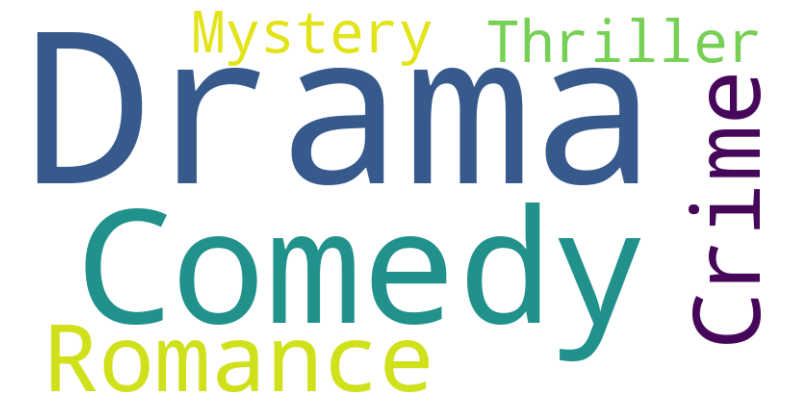

In [115]:
#Let's Visvalize it using word cloud
# Top Movies Genres
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the Pandas Series to a string
text = ' '.join(top_5_genres.index)  # Join genre names into a single string

# Generate the word cloud using the string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Finding Predominant Streaming Service**

In [107]:
# Write Your Code here
# Combine 'Movie Streaming Service' and 'Streaming Platform' columns into one
combined_streaming_data = pd.concat([df_movie['Movie Streaming Service'],
                                          df_tv_shows['Streaming Platform']],
                                          ignore_index=True)

# Count the occurrences of each streaming service & highest count
streaming_counts = combined_streaming_data.value_counts().idxmax()

In [117]:
streaming_counts

'Amazon Prime Video'

In [ ]:
combined_streaming_data

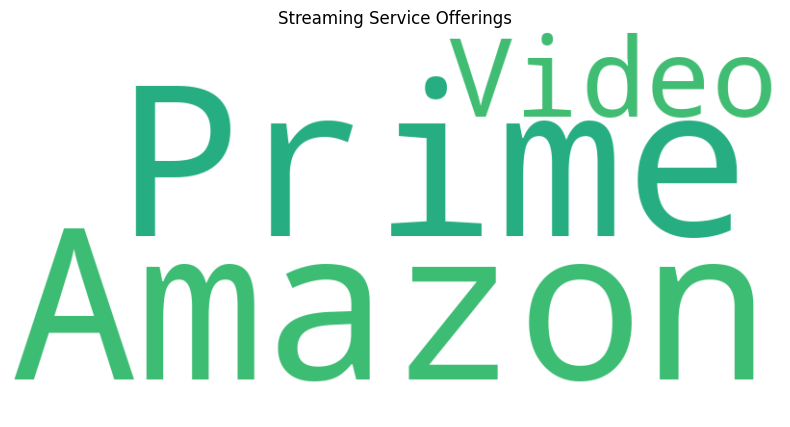

In [109]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Taking text data from streaming service names
text_data = streaming_counts

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Streaming Service Offerings')
plt.show()

## **Task 3 :- Data Export**

In [110]:
#saving final dataframe as Final Data in csv format
df_movie.to_csv('Movie_Data.csv', index=False)

In [111]:

df_tv_shows.to_csv('TvShow_Data.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**

# ***Congratulations!!! You have completed your Assignment.***